# Création d'un classifieur de chiffres

Le rôle d'un classifieur est de mettre une donnée d'entrée dans une des classes apprises par le modèle.

Dans notre cas, le classifieur de chiffres prend une image en entrée et prédit le chiffre inscrit sur l'image. Le classifieur est un [k-NN (_k-nearest neighbors_)](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins).

## Description du jeu de données

In [1]:
from sklearn.datasets import load_digits  # liste d'images de chiffres et leur étiquettes associées 

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Affichage de quelques exemples

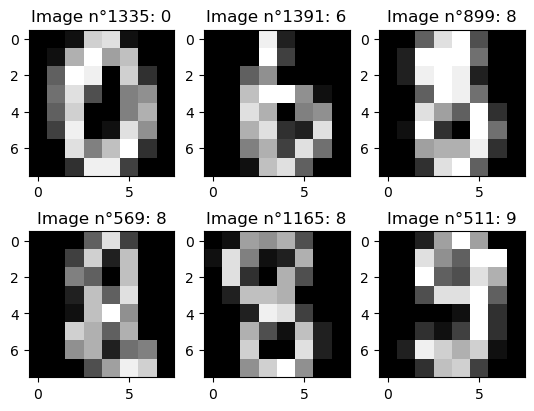

In [11]:
import random
import matplotlib.pyplot as plt  # bibliothèque pour tracer des graphes et afficher des images

figure, axs = plt.subplots(2, 3)
for ax in axs.flat:
    idx = random.randint(0, len(digits.images))
    ax.set_title(f'Image n°{idx}: {digits.target[idx]}')
    ax.imshow(digits.images[idx], cmap="gray", vmin=0, vmax=16)

## Séparation du jeu d'apprentissage et du jeu de test

In [3]:
from sklearn.model_selection import train_test_split  # diviser automatiquement le jeu de données en un jeu d'apprentissage et un jeu de test

(X_train, X_test, y_train, y_test) = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=42
)
print("Nombre d'éléments pour l'apprentissage:", len(X_train))
print("Nombre d'éléments pour les tests:", len(X_test))

Nombre d'éléments pour l'apprentissage: 1347
Nombre d'éléments pour les tests: 450


## Recherche des hyperparamètres

Un hyperparamètre est un paramètre qui doit être fixé avant l'apprentissage, parce que le modèle ne va pas pouvoir le déduire des données. Le choix des hyperparamètres est critique, car il peut énormément influencer sur les performances du modèle. Ici, notre modèle n'a qu'un seul hyperparamètre: **k**.

Pour choisir **k**, nous allons calculer la précision du modèle pour différentes valeurs de **k**. Afin d'avoir des résultats stables, ne dépendant pas trop du sous-ensemble d'entraînement, nous utilisons la méthode de [la validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e).

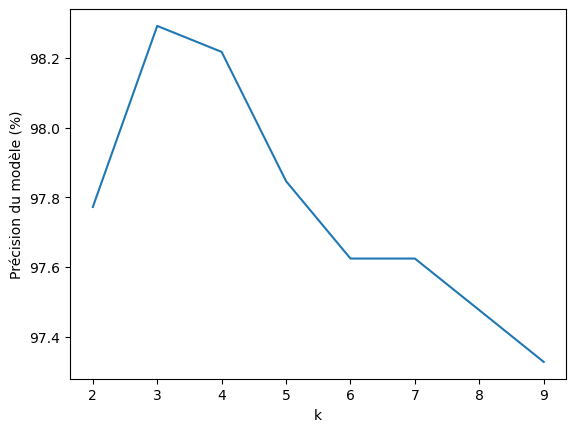

In [4]:
from sklearn.neighbors import KNeighborsClassifier  # classifieur de type K-NN
from sklearn.model_selection import cross_val_score  # validation croisée du modèle
import numpy as np  # bibliothèque scientifique de calculs numériques

ks = np.arange(2, 10)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train)  # renvoie 5 scores entre 0 et 1 (rapport entre le nombre de bonnes prédictions et le nombre total de prédictions)
    scores.append(score.mean() * 100)

plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Précision du modèle (%)')
plt.show()

Nous voulons que notre modèle ait la meilleur précision possible. La meilleur valeur pour **k** est donc **3**.

## Entraînement du modèle

In [5]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(digits.data, digits.target)

KNeighborsClassifier(n_neighbors=3)

## Enregistrement du modèle

In [6]:
import os  # fonctions de base du système d'exploitation
import pickle  # sérialisation, déserialisation (transformer un objet Python en mémoire en une forme enregistrable sur le disque et inversement)

with open(os.path.join(os.getcwd(), "digit_classifier.pkl"), "wb") as f:
    pickle.dump(model, f)

## Remarque

Contrairement à ce qui a été fait ici, il est recommandé de metre tous les imports Python au début d'un script ou d'un notebook. Ça permet, en un coup d'oeil, de visulaliser toutes les dépendances du projet. Si ça n'a pas été fait ici, c'est uniquement à viser pédagogique, en introduisant et en expliquant chaque import au moment opportun.